     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.2 MB/s eta 0:00:0000:0100:01


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

0it [00:00, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:649: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

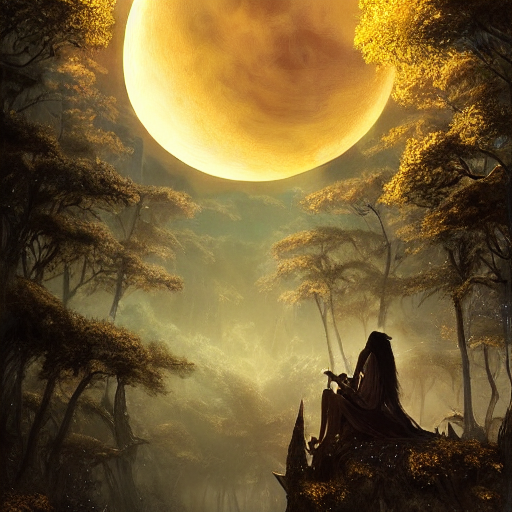

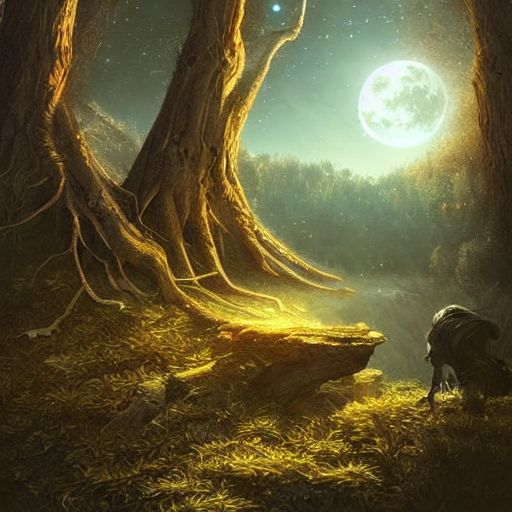

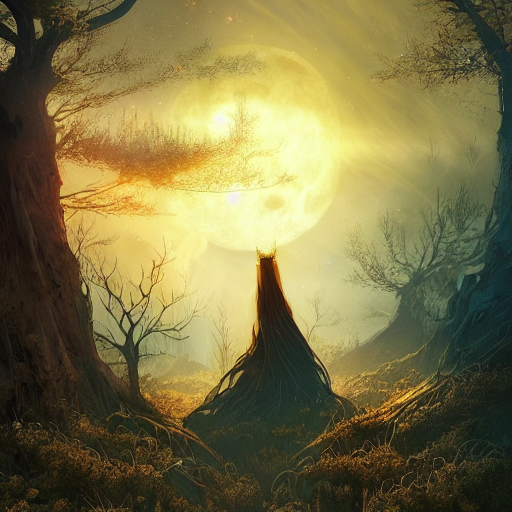

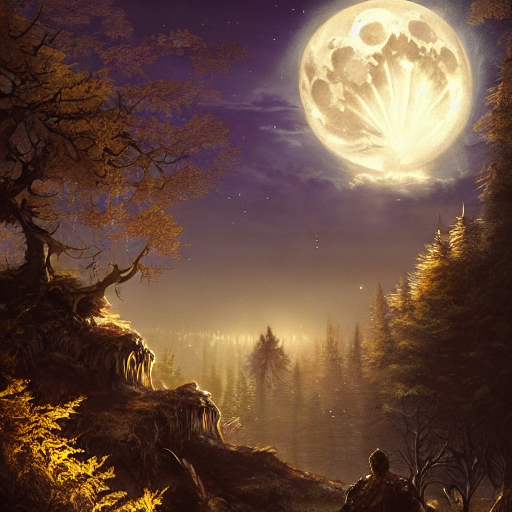

In [1]:
#这个脚本展示如何更好的生成图片的流程. CLIP Guided Stable Diffusion 这个修正可以让结果更写实. 这种是社区pipeline
!pip install diffusers
from diffusers import DiffusionPipeline
from transformers import CLIPImageProcessor, CLIPModel
import torch


feature_extractor = CLIPImageProcessor.from_pretrained("laion/CLIP-ViT-B-32-laion2B-s34B-b79K")
clip_model = CLIPModel.from_pretrained("laion/CLIP-ViT-B-32-laion2B-s34B-b79K", torch_dtype=torch.float16)


guided_pipeline = DiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    custom_pipeline="clip_guided_stable_diffusion",
    clip_model=clip_model,
    feature_extractor=feature_extractor,
    torch_dtype=torch.float16,
)
guided_pipeline.enable_attention_slicing()
guided_pipeline = guided_pipeline.to("cuda")

prompt = "fantasy book cover, full moon, fantasy forest landscape, golden vector elements, fantasy magic, dark light night, intricate, elegant, sharp focus, illustration, highly detailed, digital painting, concept art, matte, art by WLOP and Artgerm and Albert Bierstadt, masterpiece"

generator = torch.Generator(device="cuda").manual_seed(0)
images = []
for i in range(4):
    image = guided_pipeline(
        prompt,
        num_inference_steps=50,
        guidance_scale=7.5,
        clip_guidance_scale=100,
        num_cutouts=4,
        use_cutouts=False,
        generator=generator,
    ).images[0]
    images.append(image)
from IPython.display import display
# save images locally
for i, img in enumerate(images):
    display(img)
#     img.save(f"./image_{i}.png")
    
    
